# QA for batch mock analysis: picca outputs (single-mock)

This is a quality assessment notebook to make simple plots when analysing a batch of mocks. This notebook focuses on assessing the outputs from picca when analysing an individual mock.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import fitsio
import healpy as hp
import os

from lyacolore import utils

In [3]:
from batch_plot import *

In [215]:
# Point to realisation
picca_dir = '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/'
realisation = 'v9.0.0'
cat_file = 'drq_qso.fits'

In [216]:
mocknames = ['desi-raw','desi-1.0-1000','desi-1.0-4']

## QSO sample

In [217]:
cat_files = {m: os.path.join(picca_dir,realisation,m,'data/object_catalogs',cat_file) for m in mocknames}

In [218]:
for m in mocknames[1:-1]:
    with fitsio.FITS(cat_files[m]) as h:
        print('drq file contains: {} QSOs'.format(len(h[1][:])))

drq file contains: 1071846 QSOs


$\langle z \rangle$ across the sky

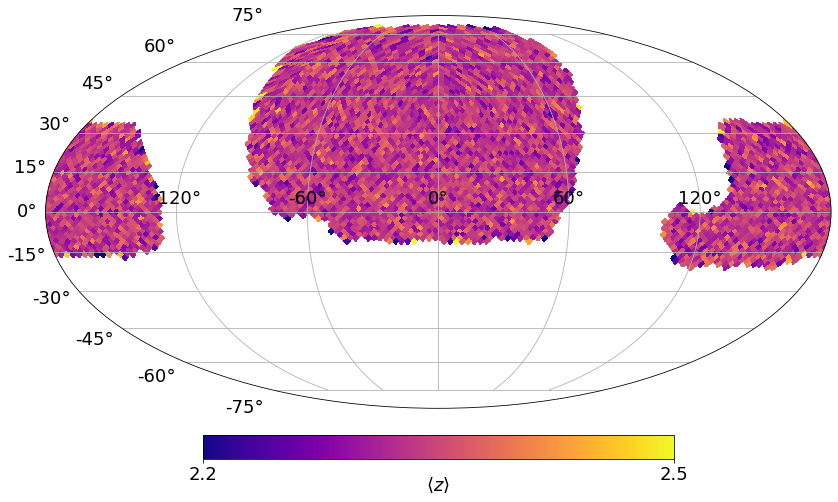

In [224]:
for m in mocknames[1:-1]:
    mean_quant_sky(cat_files[m],'drq',nside=32,quant='z',vmin=2.2,vmax=2.5)

$n(z)$

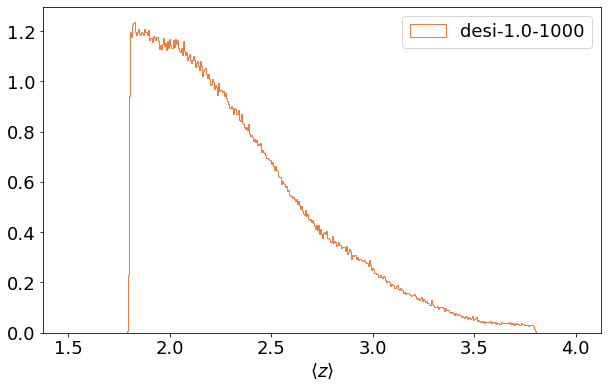

In [235]:
iterable = mocknames[1:-1]
quant_hist([cat_files[m] for m in iterable],
           ['drq']*len(iterable),
           labels = iterable,
           quant = 'z',
           density = True,
          )

$n(z)$ across the sky

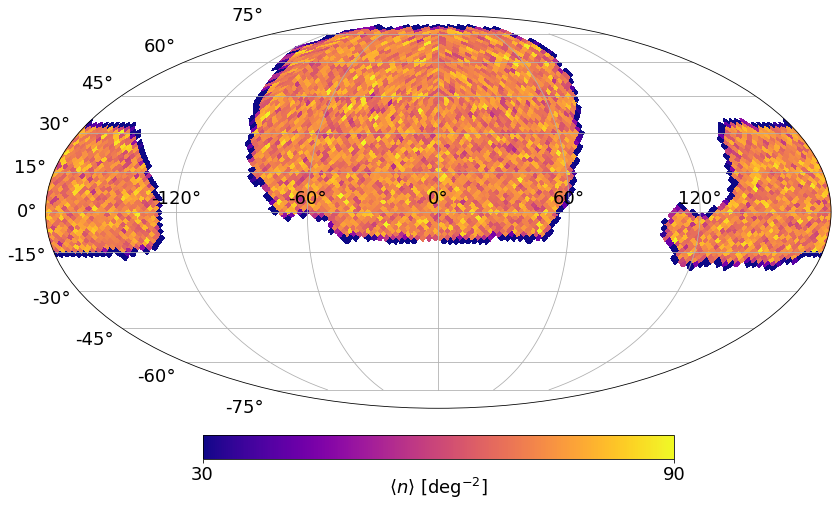

In [228]:
for m in mocknames[1:-1]:
    mean_quant_sky(cat_files[m],'drq',nside=32,quant='ndens',vmin=30,vmax=90)

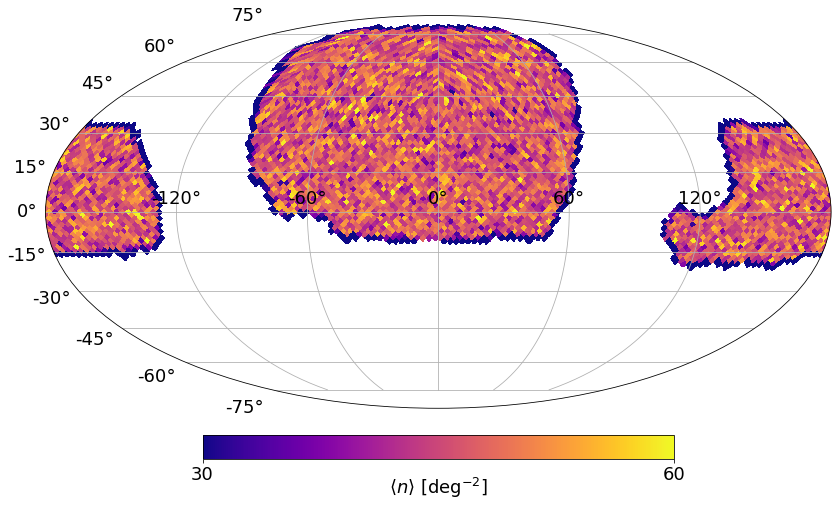

In [231]:
for m in mocknames[1:-1]:
    mean_quant_sky(cat_files[m],'drq',nside=32,quant='ndens',vmin=30,vmax=60,zmin=2.1)

## Example deltas

Show example deltas

In [ ]:
ipix = 47
iskw = 14
nside_lyb = 8

mean of delta for desi-raw       : 0.05519
mean of delta for desi-1.0-1000  : 0.01999
mean of delta for desi-1.0-4     : 0.01701


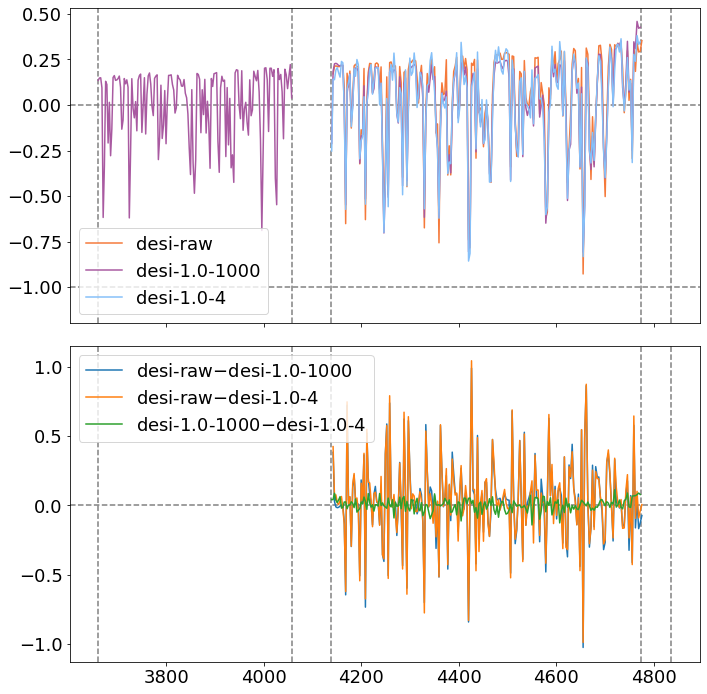

In [207]:
fig, axs = plt.subplots(2,1,figsize=(10,10),squeeze=False,sharex=True)

lyb_available = False
for i,m in enumerate(mocknames):
    try:
        h = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas_lyaregion/delta-{}.fits.gz'.format(m,ipix))
    except OSError:
        h = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas/delta-{}.fits.gz'.format(m,ipix))
    axs[0,0].plot(10**h[iskw][:]['LOGLAM'],h[iskw][:]['DELTA'],label=m,c=mycolours['C{}'.format(i)])
    print('mean of delta for {:15s}: {:2.5f}'.format(m,np.mean(h[iskw][:]['DELTA'])))
    axs[0,0].legend()
    
    ## Use RA and DEC to work out which pixel the spectrum's Lyb region delta
    ## is in (picca auto-assigns nside to 8 rather than 16 normally).
    ra = h[iskw].read_header()['RA']
    dec = h[iskw].read_header()['DEC']
    z = h[iskw].read_header()['Z']
    theta = np.pi/2. - dec
    phi = ra
    lybpix = hp.ang2pix(nside_lyb,np.pi/2.-dec,ra,nest=False)
    tid = h[iskw].read_header()['THING_ID']
    
    try:
        h = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas_lybregion/delta-{}.fits.gz'.format(m,lybpix))
        #tids = np.array([hdu.read_header()['THING_ID'] for hdu in h[1:]])
        #iskw_new = np.argmax(np.in1d(tids,tid)) + 1
        axs[0,0].plot(10**h[tid][:]['LOGLAM'],h[tid][:]['DELTA'],c=mycolours['C{}'.format(i)])
        lyb_available = True
    except:
        continue

axs[0,0].axhline(y=-1.,color='grey',ls='--',zorder=-10)
axs[0,0].axhline(y=0.,color='grey',ls='--',zorder=-10)

axs[0,0].set_ylim(-1.2,None)

for i,m in enumerate(mocknames[:-1]):
    try:
        h = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas_lyaregion/delta-{}.fits.gz'.format(m,ipix))
    except OSError:
        h = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas/delta-{}.fits.gz'.format(m,ipix))
    for m2 in mocknames[i+1:]:
        try:
            h2 = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas_lyaregion/delta-{}.fits.gz'.format(m2,ipix))
        except OSError:
            h2 = fitsio.FITS(picca_dir+'v9.0.0/{}/data/deltas/delta-{}.fits.gz'.format(m2,ipix))
        axs[1,0].plot(10**h[iskw][:]['LOGLAM'],h[iskw][:]['DELTA']-h2[iskw][:]['DELTA'],label=r'{}$-${}'.format(m,m2))
    axs[1,0].legend()
    
axs[1,0].axhline(y=0,ls='--',color='grey',zorder=-10)

for ax in axs.flatten():
    ax.axvline(x=utils.lya_rest*(1+z),color='grey',ls='--',zorder=-10)
    ax.axvline(x=1200.*(1+z),color='grey',ls='--',zorder=-10)
    ax.axvline(x=1040.*(1+z),color='grey',ls='--',zorder=-10)
    ax.axvline(x=1020.*(1+z),color='grey',ls='--',zorder=-10)
    ax.axvline(x=920.*(1+z),color='grey',ls='--',zorder=-10)

plt.tight_layout()

## Properties of the delta field

$\langle \delta_F \rangle$

$\sigma_{\delta_F}$

## Standard correlations

Ly$\alpha$ auto-correlation

Ly$\alpha$-QSO cross-correlation

## Additional correlations

QSO auto-correlation

Ly$\alpha$-DLA cross-correlation